In [178]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, VarianceThreshold, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [179]:
# Load dataset
df_original = pd.read_csv("./data/raw/hypertension_dataset.csv")

# print first 5 rows
print("First 5 rows : ")
print(df_original.head())

print("\nDF (Rows, Colums) :", df_original.shape)

First 5 rows : 
     Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         UK   58  29.5          230          160            79   
1      Spain   34  36.2          201          120            84   
2  Indonesia   73  18.2          173          156            60   
3     Canada   60  20.3          183          122            94   
4     France   73  21.8          296           91            97   

  Smoking_Status  Alcohol_Intake Physical_Activity_Level Family_History  ...  \
0          Never            27.9                     Low            Yes  ...   
1          Never            27.5                    High            Yes  ...   
2        Current             1.8                    High            Yes  ...   
3          Never            11.6                Moderate            Yes  ...   
4          Never            29.1                Moderate            Yes  ...   

  Sleep_Duration  Heart_Rate  LDL  HDL  Triglycerides  Glucose  Gender  \
0            6.1          

In [180]:
# Handle missing values
print("\nMissing values per column:")
print(df_original.isnull().sum())

# remove missing 
df_original = df_original.dropna(axis=1)
print(df_original.head)



Missing values per column:
Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64
<bound method NDFrame.head of           Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0              UK   58  29.5          230          160            79   
1           Spain   34  36.2          201          120            84   
2       Indonesia   73  18.2          173     

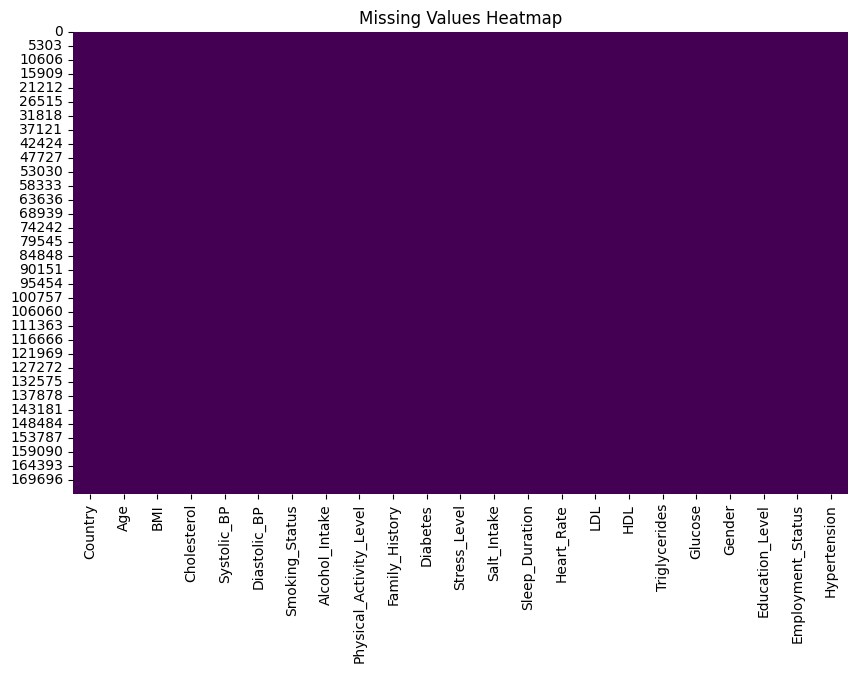

In [181]:
# Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_original.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('./results/eda_visualizations/1_missing_values_heatmap.png')
plt.show()

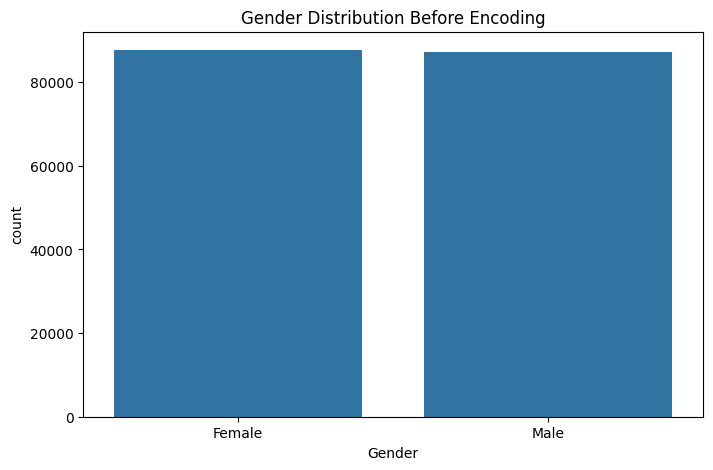

In [182]:
# Gender visualize
plt.figure(figsize=(8,5))
sns.countplot(x="Gender", data=df_original)
plt.title("Gender Distribution Before Encoding")
plt.savefig('./results/eda_visualizations/2_Gender_Distribution_Before_Encodingvisualization.png')
plt.show()

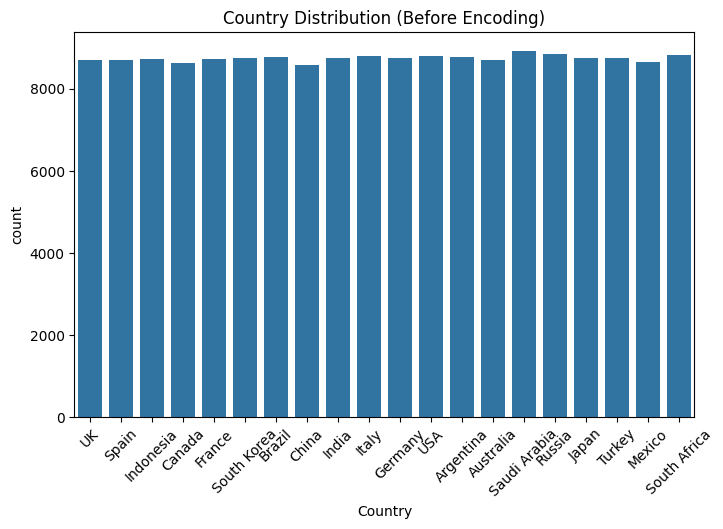

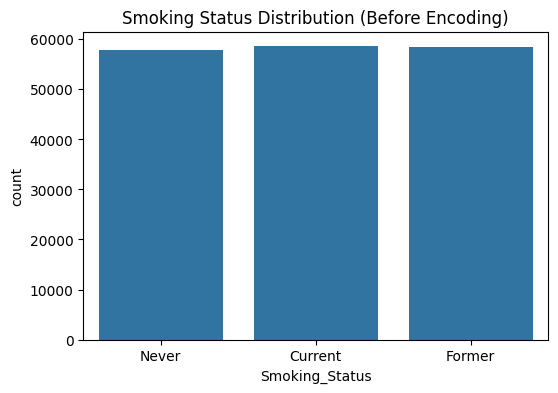

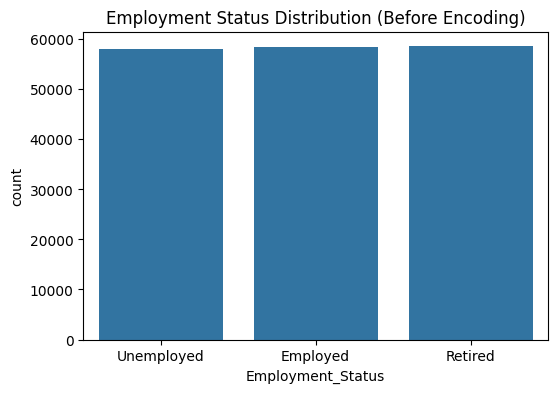

In [183]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_original["Country"])
plt.title("Country Distribution (Before Encoding)")
plt.xticks(rotation=45)
plt.savefig('./results/eda_visualizations/3_Country_Distribution_Before_Encoding.png')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=df_original["Smoking_Status"])
plt.title("Smoking Status Distribution (Before Encoding)")
plt.savefig('./results/eda_visualizations/4_Smoking_Status_Distribution_Before Encoding.png')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=df_original["Employment_Status"])
plt.title("Employment Status Distribution (Before Encoding)")
plt.savefig('./results/eda_visualizations/5_Employment_Status_Distribution_Before_Encoding.png')
plt.show()


In [184]:
# Encode
print("Before Label Encoding:")
print(df_original.dtypes)

# Label Encode

# Define mappings for ordinal features
hypertension_map = {'Low': 0, 'High': 1}
activity_map = {'Low': 0, 'Moderate': 1, 'High': 2}
education_level_map = {'Primary': 0, 'Secondary': 1, 'Tertiary': 2}
diabetes_map = {'No': 0, 'Yes': 1}
gender_map = {'Female': 0, 'Male': 1}
family_history_map = {'No': 0, 'Yes': 1}

# Apply mappings
df_original['Hypertension'] = df_original['Hypertension'].map(hypertension_map)
df_original['Physical_Activity_Level'] = df_original['Physical_Activity_Level'].map(activity_map)
df_original['Education_Level'] = df_original['Education_Level'].map(education_level_map)
df_original['Diabetes'] = df_original['Diabetes'].map(diabetes_map)
df_original['Gender'] = df_original['Gender'].map(gender_map)
df_original['Family_History'] = df_original['Family_History'].map(family_history_map)

print("\nAfter Label Encoding:")
print(df_original.head())

Before Label Encoding:
Country                     object
Age                          int64
BMI                        float64
Cholesterol                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Smoking_Status              object
Alcohol_Intake             float64
Physical_Activity_Level     object
Family_History              object
Diabetes                    object
Stress_Level                 int64
Salt_Intake                float64
Sleep_Duration             float64
Heart_Rate                   int64
LDL                          int64
HDL                          int64
Triglycerides                int64
Glucose                      int64
Gender                      object
Education_Level             object
Employment_Status           object
Hypertension                object
dtype: object

After Label Encoding:
     Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         UK   58  29.5          230          160            79   
1

In [185]:
print(df_original.dtypes)

Country                     object
Age                          int64
BMI                        float64
Cholesterol                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Smoking_Status              object
Alcohol_Intake             float64
Physical_Activity_Level      int64
Family_History               int64
Diabetes                     int64
Stress_Level                 int64
Salt_Intake                float64
Sleep_Duration             float64
Heart_Rate                   int64
LDL                          int64
HDL                          int64
Triglycerides                int64
Glucose                      int64
Gender                       int64
Education_Level              int64
Employment_Status           object
Hypertension                 int64
dtype: object


In [186]:
# One-Hot Encoding for multi-category columns
country_dummies = pd.get_dummies(df_original["Country"], prefix="Country").astype(int)
smoking_status_dummies = pd.get_dummies(df_original["Smoking_Status"], prefix="Smoking_Status").astype(int)
employment_status_dummies = pd.get_dummies(df_original["Employment_Status"], prefix="Employment_Status").astype(int)

# Add encoded columns to dataset
df_original = pd.concat([df_original, country_dummies], axis=1)
df_original = pd.concat([df_original, smoking_status_dummies], axis=1)
df_original = pd.concat([df_original, employment_status_dummies], axis=1)

# Drop old columns
df_original.drop("Country", axis=1, inplace=True)
df_original.drop("Smoking_Status", axis=1, inplace=True)
df_original.drop("Employment_Status", axis=1, inplace=True)

print("\nAfter One-Hot Encoding:")
print("Dataset shape:", df_original.shape)

df_original.to_csv("results/outputs/hypertension_dataset(encoded).csv", index=False)


After One-Hot Encoding:
Dataset shape: (174982, 46)


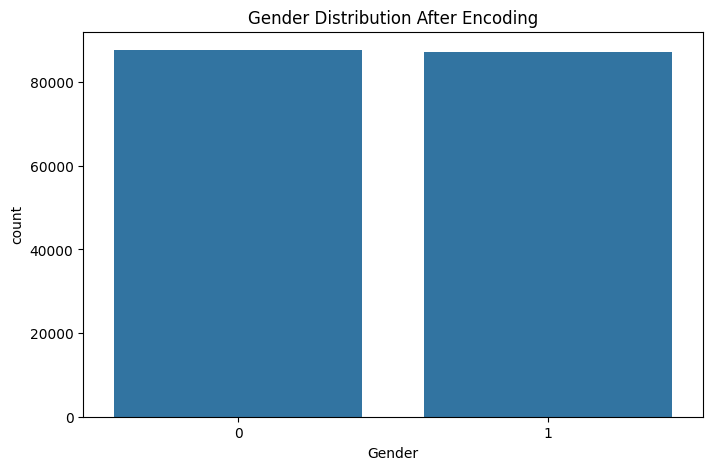

In [187]:
# Gender visualize
plt.figure(figsize=(8,5))
sns.countplot(x="Gender", data=df_original)
plt.title("Gender Distribution After Encoding")
plt.savefig('./results/eda_visualizations/6_Gender_Distribution_Before_Encoding.png')
plt.show()

In [188]:
# Check class distribution
print(df_original['Hypertension'].value_counts())
print(df_original['Hypertension'].value_counts(normalize=True))

Hypertension
1    125781
0     49201
Name: count, dtype: int64
Hypertension
1    0.718823
0    0.281177
Name: proportion, dtype: float64


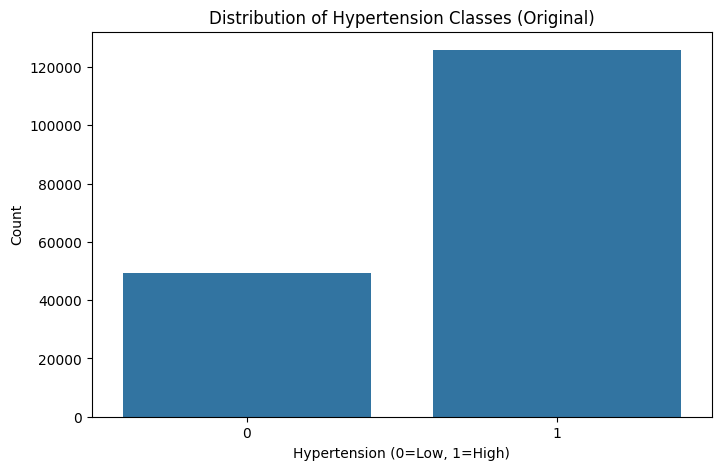

In [189]:

# Class Distribution of Hypertension
plt.figure(figsize=(8, 5))
sns.countplot(x='Hypertension', data=df_original)
plt.title('Distribution of Hypertension Classes (Original)')
plt.xlabel('Hypertension (0=Low, 1=High)')
plt.ylabel('Count')
plt.savefig('./results/eda_visualizations/7_hypertension_distribution_original.png')
plt.show()

In [190]:
# Devide target variable
X = df_original.drop("Hypertension", axis=1)
y = df_original["Hypertension"]

# Create Smote object for oversampling
smote = SMOTE(random_state=42)
# Oversampling
X_smote, y_smote = smote.fit_resample(X, y)

print("Before:", Counter(y))
print("After:", Counter(y_smote))

# Create new dataset using oversampling data
balanced_df = pd.DataFrame(X_smote, columns=X.columns)
balanced_df["Hypertension"] = y_smote

print(balanced_df['Hypertension'].value_counts())

balanced_df.to_csv("results/outputs/hypertension_dataset(encoded-balanced).csv", index=False)

df_original = balanced_df

Before: Counter({1: 125781, 0: 49201})
After: Counter({1: 125781, 0: 125781})
Hypertension
1    125781
0    125781
Name: count, dtype: int64


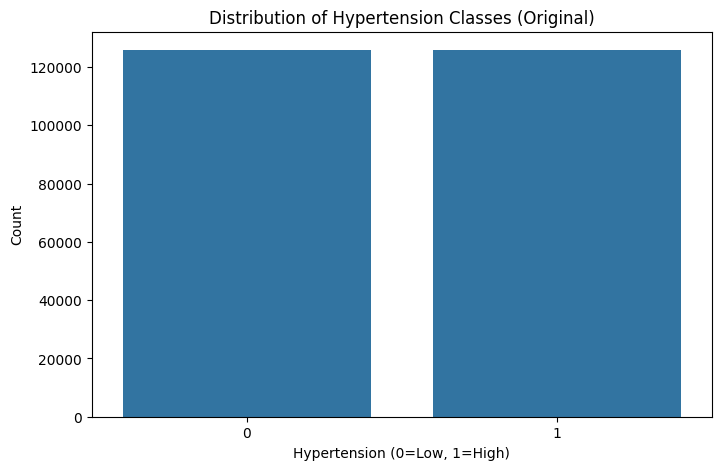

In [191]:
# Class Distribution of Hypertension after balancing
plt.figure(figsize=(8, 5))
sns.countplot(x='Hypertension', data=df_original)
plt.title('Distribution of Hypertension Classes (Original)')
plt.xlabel('Hypertension (0=Low, 1=High)')
plt.ylabel('Count')
plt.savefig('./results/eda_visualizations/8_hypertension_distribution_original.png')
plt.show()

In [192]:
# Extract duplicated
duplicate_rows_df = df_original[df_original.duplicated()]
# Print shape rows and column
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Remove duplicates
df_original = df_original.drop_duplicates()
df_original.shape

number of duplicate rows:  (0, 46)


(251562, 46)

In [193]:
# Select numerical columns
numerical_dataset = df_original.select_dtypes(include=[np.number])
numeric_cols = numerical_dataset.columns.tolist()

Q1 = df_original[numeric_cols].quantile(0.25) 
Q3 = df_original[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Outliers > Upper bound | Outliers < Lower bound
condition = ((df_original[numeric_cols] >= lower_bound) & (df_original[numeric_cols] <= upper_bound)).any(axis=1)

df_original = df_original[condition]

print("Shape after outlier removal:", df_original.shape)

Shape after outlier removal: (251562, 46)


In [194]:
# Create BMI categories using ORIGINAL (unscaled) values
def bmi_category(bmi):
    """Categories based on WHO standards (kg/m²)"""
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
    
def age_group(age: int) -> str:
    """Categorize a person into age groups."""
    if age < 0:
        return "Invalid"
    elif age < 13:
        return "Child"
    elif age < 20:
        return "Teen"
    elif age < 36:
        return "Young Adult"
    elif age < 51:
        return "Adult"
    elif age < 66:
        return "Middle-aged"
    else:
        return "Senior"

# Categorize features
df_original['BMI_Category'] = df_original['BMI'].apply(bmi_category)
df_original['Age_Group'] = df_original['Age'].apply(age_group)

# Create features using ORIGINAL clinical measurements
df_original['Pulse_Pressure'] = df_original['Systolic_BP'] - df_original['Diastolic_BP']
df_original['Cholesterol_Ratio'] = (df_original['LDL'] + df_original['HDL'] + df_original['Triglycerides']/5) / df_original['HDL']
df_original['Cholesterol_BMI'] = df_original['Cholesterol'] * df_original['BMI']
df_original['BP_Interaction'] = df_original['Systolic_BP'] * df_original['Diastolic_BP']
df_original['LDL_HDL_Ratio'] = df_original['LDL'] / (df_original['HDL'] + 1e-5)
df_original['Triglycerides_Glucose'] = df_original['Triglycerides'] * df_original['Glucose']

# One-Hot Encoding for Categorize features
bmi_category_dummies = pd.get_dummies(df_original["BMI_Category"], prefix="BMI_Category").astype(int)
age_category_dummies= pd.get_dummies(df_original["Age_Group"], prefix="Age_Group").astype(int)

# Add encoded columns to dataset
df_original = pd.concat([df_original, bmi_category_dummies], axis=1)
df_original = pd.concat([df_original, age_category_dummies], axis=1)

df_original.drop('BMI_Category', inplace=True, axis=1)
df_original.drop('Age_Group', inplace=True, axis=1)

# get new shape
print("\nAfter Feature Engineering:")
print("Dataset shape:", df_original.shape)

df_original.to_csv("results/outputs/hypertension_dataset(encoded-balanced-feature_engineered).csv", index=False)


After Feature Engineering:
Dataset shape: (251562, 61)


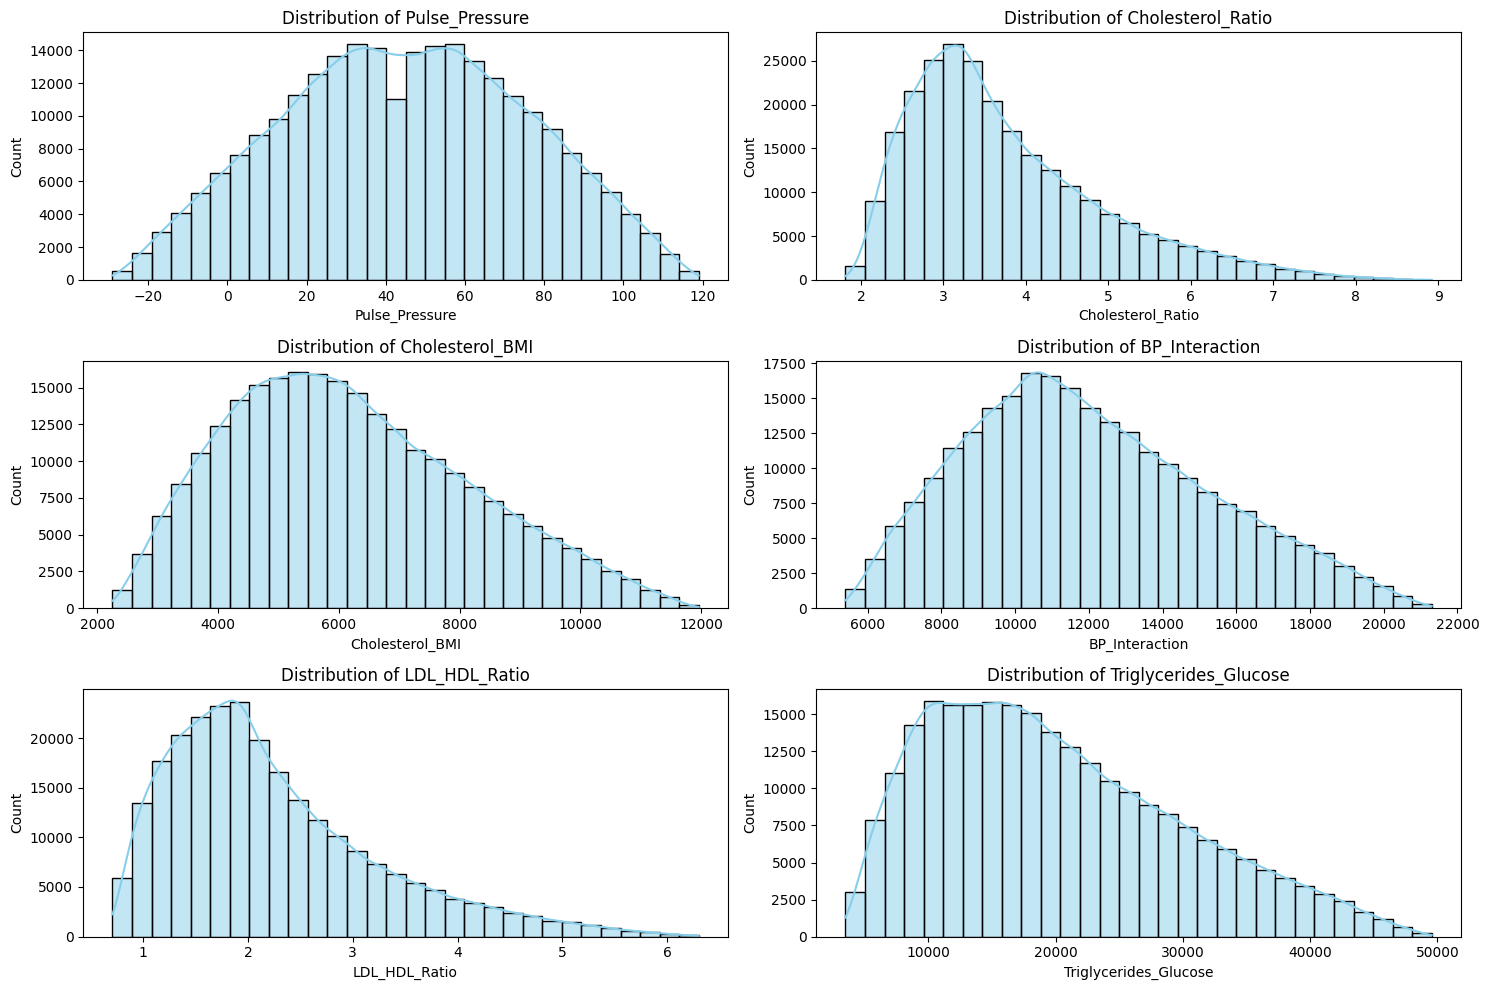

In [195]:
# Created features distribution
numeric_features = ['Pulse_Pressure', 'Cholesterol_Ratio', 'Cholesterol_BMI',
                    'BP_Interaction', 'LDL_HDL_Ratio', 'Triglycerides_Glucose']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_original[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig('./results/eda_visualizations/9_Pulse_Pressure,Cholesterol_Ratio,Cholesterol_BMI,BP_Interaction,LDL_HDL_Ratio,Triglycerides_Glucose.png')
plt.show()


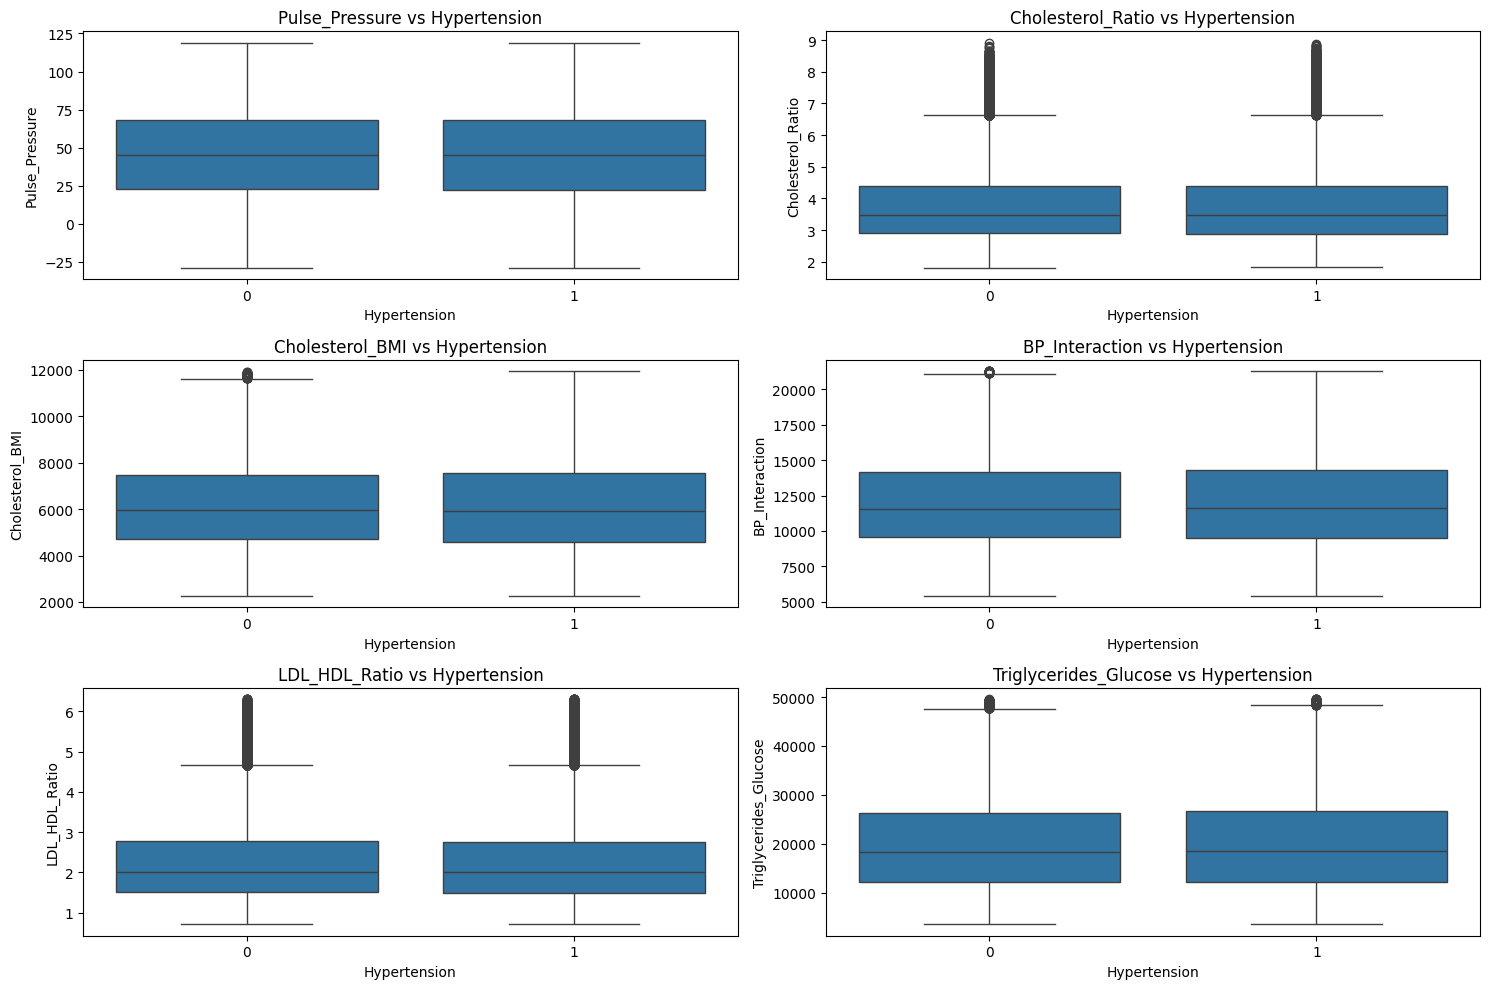

In [196]:
target = 'Hypertension'  # replace if your target column has a different name

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=target, y=df_original[feature], data=df_original)
    plt.title(f'{feature} vs {target}')
plt.tight_layout()
plt.savefig('./results/eda_visualizations/10_Hypertension_vc_Pulse_Pressure,Cholesterol_Ratio,Cholesterol_BM,BP_Interaction,LDL_HDL_Ratio,Triglycerides_Glucose.png')
plt.show()

In [197]:
scaling_cols = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration',
       'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose', 'Pulse_Pressure',
       'Cholesterol_Ratio', 'Cholesterol_BMI', 'BP_Interaction',
       'LDL_HDL_Ratio', 'Triglycerides_Glucose']

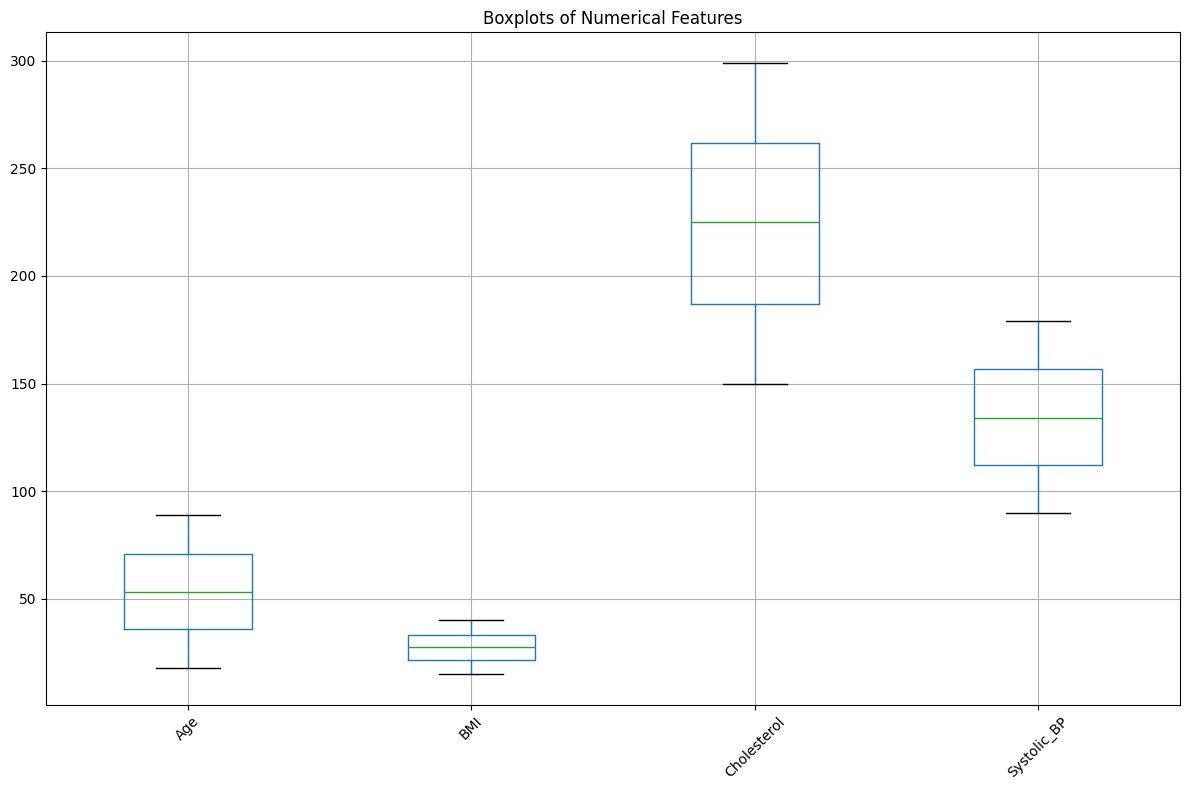

In [198]:
plt.figure(figsize=(12, 8))
df_original[['Age', 'BMI', 'Cholesterol', 'Systolic_BP',]].boxplot()
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./results/eda_visualizations/11_numerical_features_boxplot.png')
plt.show()

In [199]:
# Columns list (numerical)
scaling_cols = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration',
       'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose', 'Pulse_Pressure',
       'Cholesterol_Ratio', 'Cholesterol_BMI', 'BP_Interaction',
       'LDL_HDL_Ratio', 'Triglycerides_Glucose']

print("\nBefore Feature Scaling:")
print(df_original[scaling_cols].describe())

# Create Object: StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns (including new features)
df_original[scaling_cols] = scaler.fit_transform(df_original[scaling_cols])

print("\nAfter Feature Scaling:")
print(df_original[scaling_cols].describe())

balanced_df.to_csv("results/outputs/hypertension_dataset(encoded-balanced-feature_engineered-scaled).csv", index=False)


Before Feature Scaling:
                 Age            BMI    Cholesterol    Systolic_BP  \
count  251562.000000  251562.000000  251562.000000  251562.000000   
mean       53.415901      27.487534     224.517749     134.381624   
std        20.527762       6.918357      43.127083      25.801869   
min        18.000000      15.000000     150.000000      90.000000   
25%        36.000000      21.600000     187.000000     112.000000   
50%        53.000000      27.500000     225.000000     134.000000   
75%        71.000000      33.300000     262.000000     157.000000   
max        89.000000      40.000000     299.000000     179.000000   

        Diastolic_BP  Alcohol_Intake   Stress_Level    Salt_Intake  \
count  251562.000000   251562.000000  251562.000000  251562.000000   
mean       89.294146       14.994283       4.877203       8.482688   
std        17.016023        8.331060       2.455710       3.566882   
min        60.000000        0.000000       1.000000       2.000000   
25%

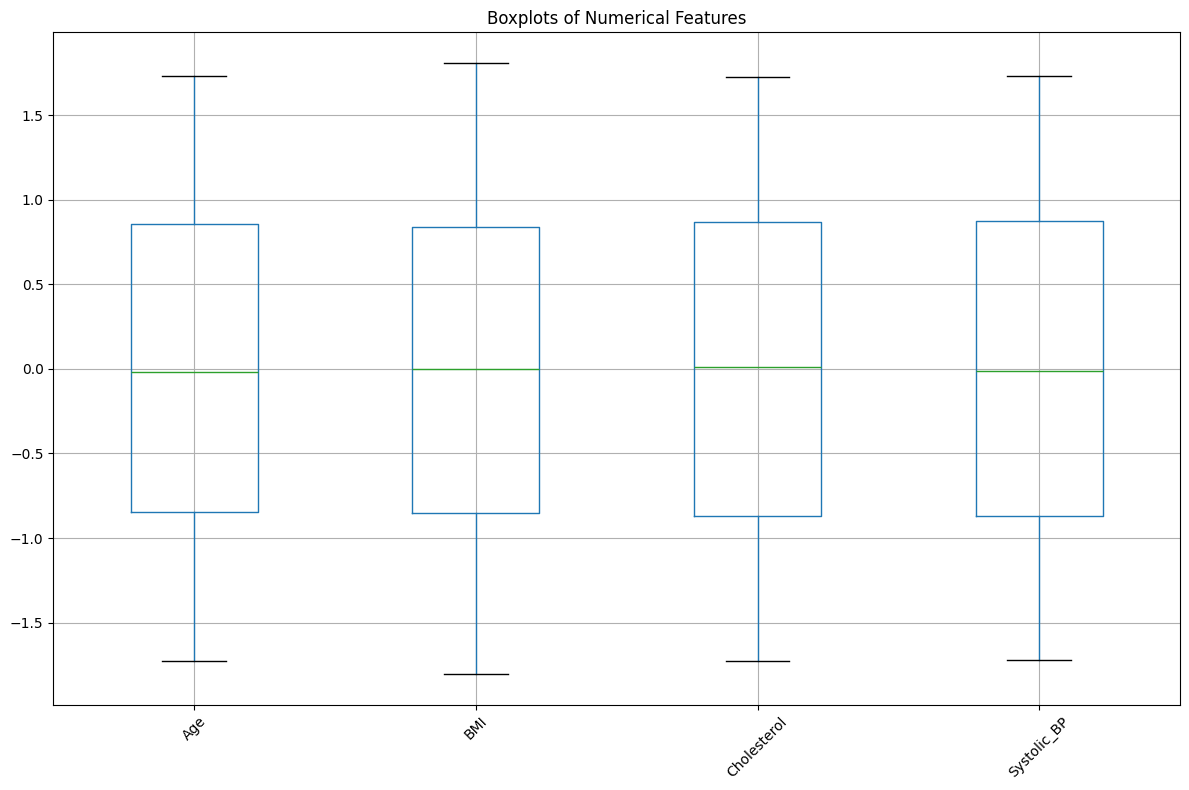

In [200]:
plt.figure(figsize=(12, 8))
df_original[['Age', 'BMI', 'Cholesterol', 'Systolic_BP',]].boxplot()
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./results/eda_visualizations/12_numerical_features_boxplot.png')
plt.show()

In [201]:
# Feature Selection
# Features and target
X = df_original.drop(columns=['Hypertension'], axis=1)
y = df_original['Hypertension']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

df_original.describe()


Training set shape: (201249, 60)
Testing set shape: (50313, 60)


,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Physical_Activity_Level,Family_History,Diabetes,Stress_Level,...,Triglycerides_Glucose,BMI_Category_Normal,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,Age_Group_Adult,Age_Group_Middle-aged,Age_Group_Senior,Age_Group_Teen,Age_Group_Young Adult
count,2.515620e+05,2.515620e+05,2.515620e+05,2.515620e+05,2.515620e+05,2.515620e+05,251562.000000,251562.000000,251562.000000,2.515620e+05,...,2.515620e+05,251562.000000,251562.000000,251562.000000,251562.000000,251562.000000,251562.000000,251562.000000,251562.000000,251562.000000
mean,7.004818e-17,-2.348026e-16,2.343225e-16,-3.380390e-16,-5.513470e-17,1.128680e-16,0.900728,0.424420,0.422103,-2.169234e-17,...,1.717310e-17,0.270860,0.393239,0.215100,0.120801,0.210143,0.210123,0.331016,0.024137,0.224581
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.789292,0.494256,0.493896,1.000002e+00,...,1.000002e+00,0.444405,0.488470,0.410893,0.325897,0.407411,0.407397,0.470580,0.153475,0.417307
min,-1.725272e+00,-1.804989e+00,-1.727868e+00,-1.720097e+00,-1.721566e+00,-1.799808e+00,0.000000,0.000000,0.000000,-1.578855e+00,...,-1.693814e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.484089e-01,-8.510034e-01,-8.699365e-01,-8.674437e-01,-8.400420e-01,-8.512805e-01,0.000000,0.000000,0.000000,-7.644253e-01,...,-8.000345e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.026048e-02,1.801940e-03,1.118211e-02,-1.479057e-02,-1.728646e-02,6.862184e-04,1.000000,0.000000,0.000000,5.000468e-02,...,-1.674521e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.566026e-01,8.401529e-01,8.691134e-01,8.766195e-01,8.642374e-01,8.524210e-01,2.000000,1.000000,1.000000,8.644347e-01,...,6.644300e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.733466e+00,1.808593e+00,1.727045e+00,1.729273e+00,1.745761e+00,1.801181e+00,2.000000,1.000000,1.000000,1.678865e+00,...,3.017661e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [202]:
# Variance Threshold
selector = VarianceThreshold(threshold=0.8)
X_high_var = selector.fit_transform(X_train)
var_features = X_train.columns[selector.get_support()]
print(f"Original features: {X_train.shape[1]}")
print(f"Features after variance threshold: {len(var_features)}")

print("Features by variance threshold :", var_features.tolist())

Original features: 60
Features after variance threshold: 20
Features by variance threshold : ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose', 'Pulse_Pressure', 'Cholesterol_Ratio', 'Cholesterol_BMI', 'BP_Interaction', 'LDL_HDL_Ratio', 'Triglycerides_Glucose']


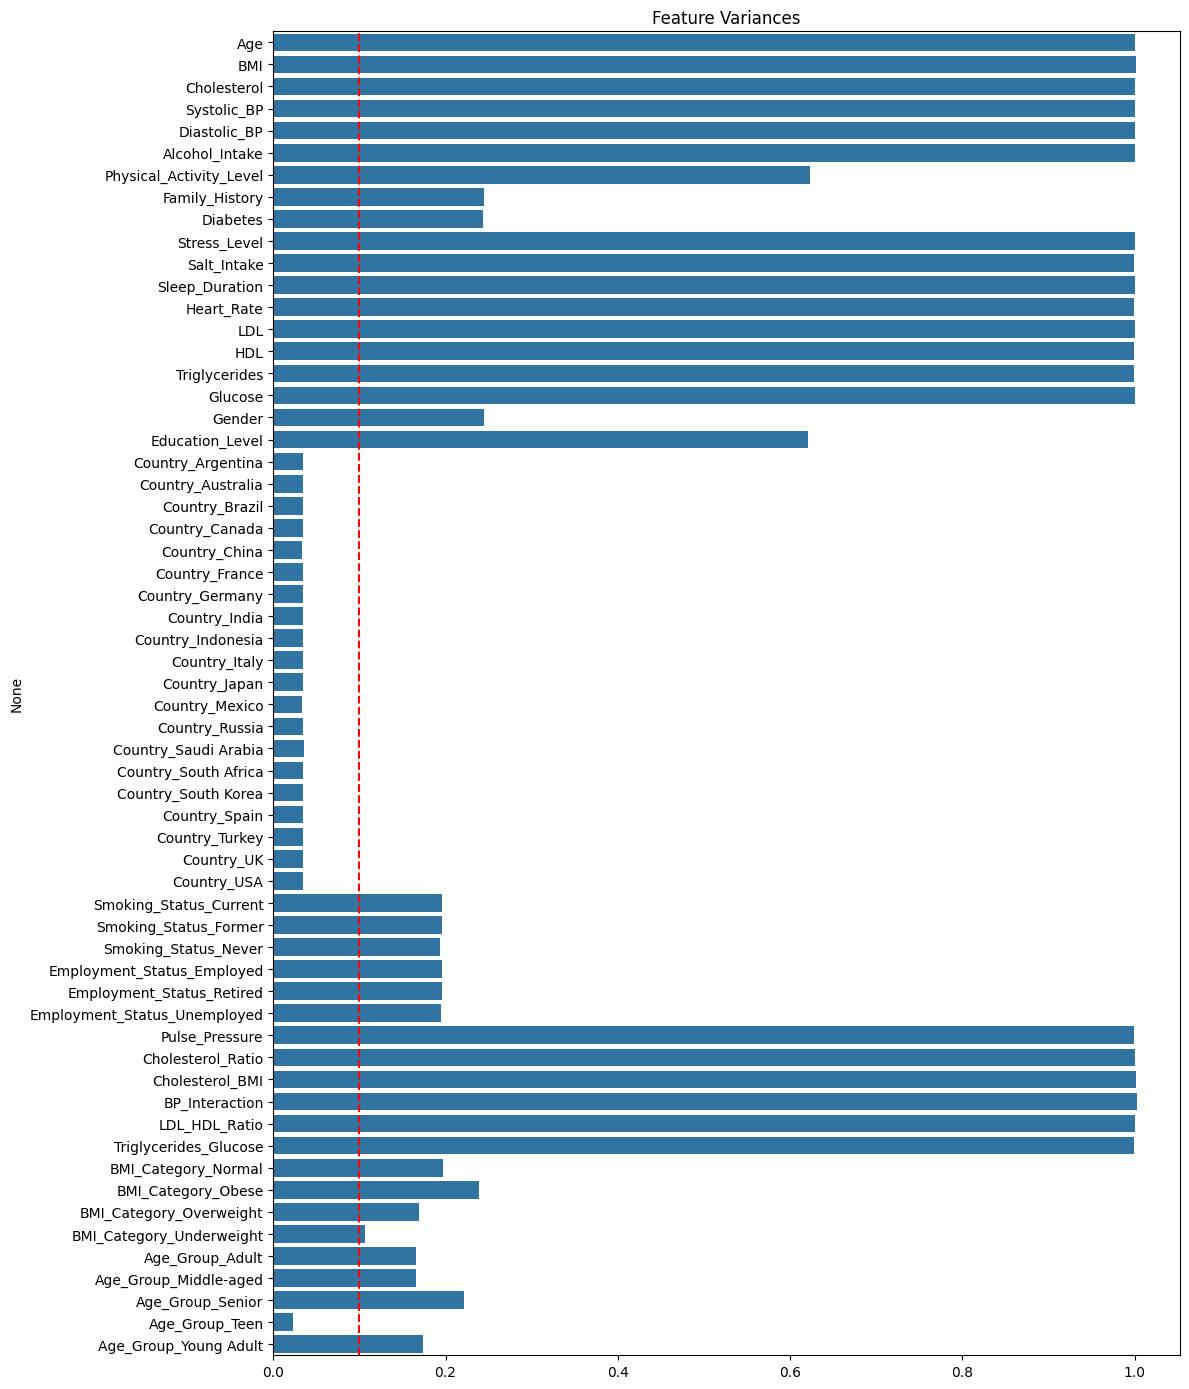

In [203]:
variances = selector.variances_
plt.figure(figsize=(12, 14))
sns.barplot(x=variances, y=X_train.columns)
plt.axvline(x=0.1, color='r', linestyle='--')
plt.title('Feature Variances')
plt.tight_layout()
plt.savefig('./results/eda_visualizations/13_feature_variance.png')
plt.show()

In [204]:
#  Mutual Information
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores = pd.Series(mi_scores, index=X_train.columns)

# Select top 25 features by MI
top_k_mi = 25
mi_features = mi_scores.sort_values(ascending=True).head(top_k_mi).index.tolist()
print(f"Top {top_k_mi} features by Mutual Information: {mi_features}")

Top 25 features by Mutual Information: ['HDL', 'Pulse_Pressure', 'Systolic_BP', 'Country_Argentina', 'Age_Group_Middle-aged', 'Age_Group_Teen', 'LDL', 'Triglycerides', 'Diastolic_BP', 'Cholesterol', 'Age', 'BMI_Category_Underweight', 'Age_Group_Adult', 'Glucose', 'Country_Canada', 'Country_South Africa', 'Heart_Rate', 'Country_UK', 'Country_Spain', 'Country_South Korea', 'Country_USA', 'Country_Italy', 'Country_France', 'Country_Turkey', 'Country_Germany']


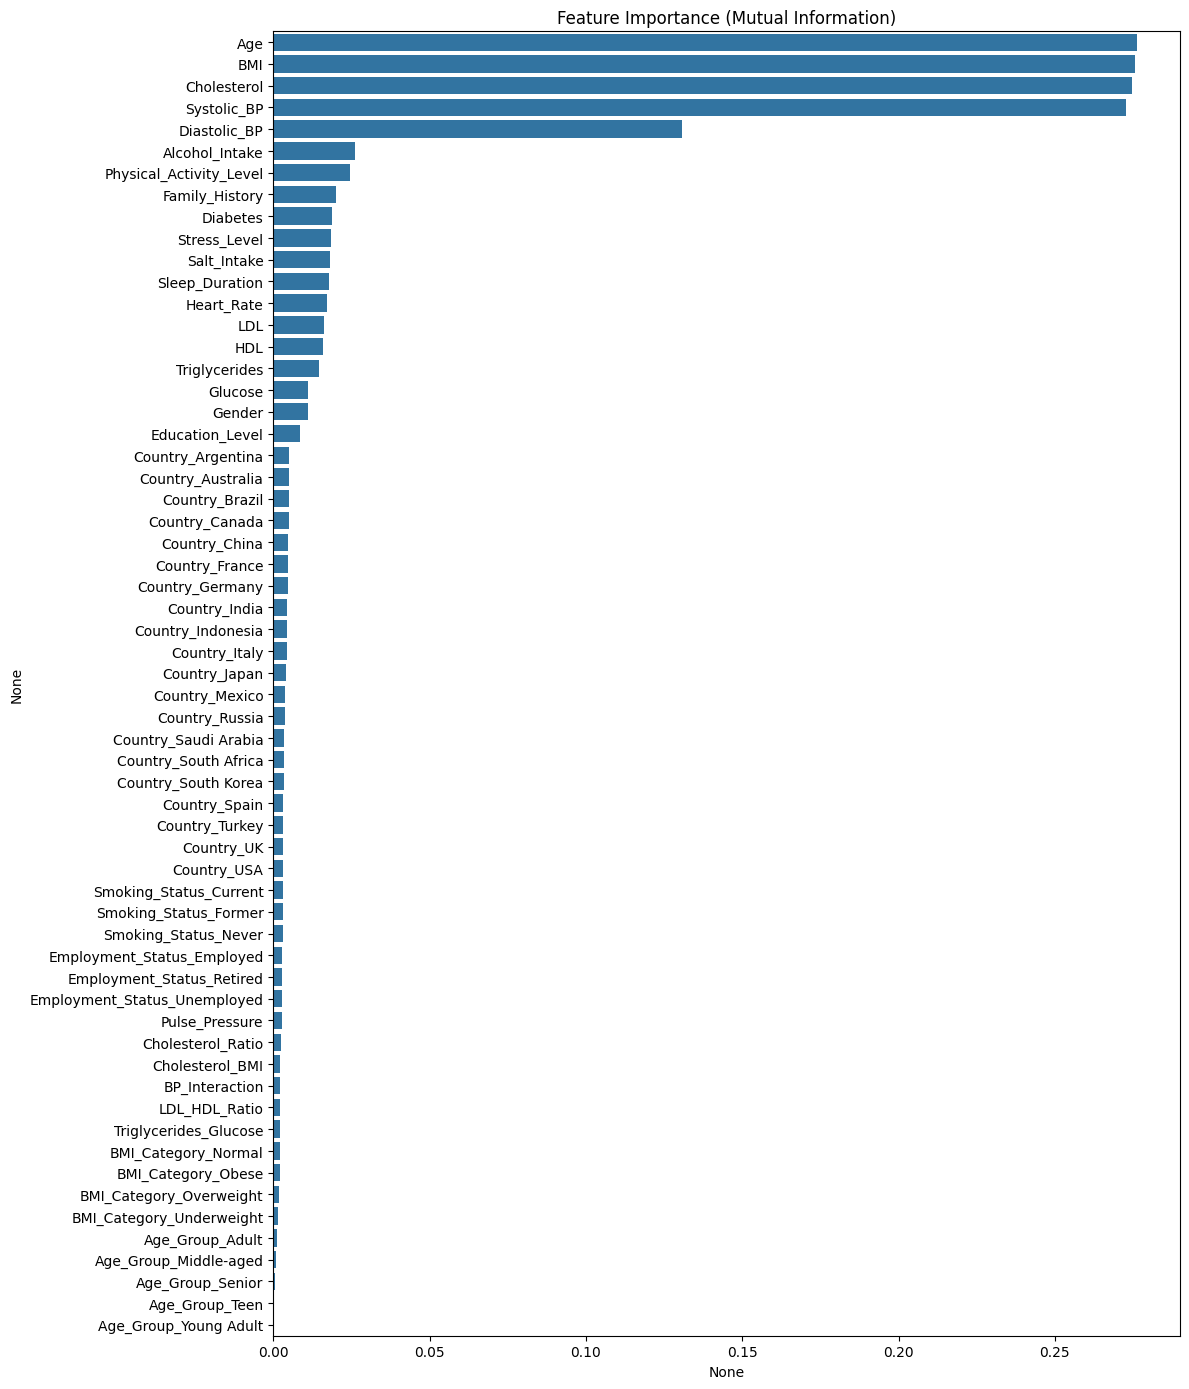

In [205]:
# Visualize mutual information scores
plt.figure(figsize=(12, 14))
sns.barplot(x= mi_scores.sort_values(ascending=False), y=mi_scores.index)
plt.title('Feature Importance (Mutual Information)')
plt.tight_layout()
plt.savefig('./results/eda_visualizations/14_feature_importance_mutual_information.png')
plt.show()

In [206]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Select top 25
# features by Random Forest
top_k_rf = 25
rf_features = forest_importances.head(top_k_rf).index.tolist()
print(f"Top {top_k_rf} features by Random Forest: {rf_features}")


Top 25 features by Random Forest: ['Smoking_Status_Former', 'Employment_Status_Unemployed', 'Smoking_Status_Current', 'Smoking_Status_Never', 'Employment_Status_Employed', 'Employment_Status_Retired', 'Alcohol_Intake', 'Salt_Intake', 'Triglycerides_Glucose', 'BP_Interaction', 'Cholesterol_BMI', 'Sleep_Duration', 'BMI', 'Cholesterol_Ratio', 'Triglycerides', 'LDL_HDL_Ratio', 'Cholesterol', 'Glucose', 'LDL', 'Pulse_Pressure', 'Heart_Rate', 'Systolic_BP', 'Age', 'HDL', 'Diastolic_BP']


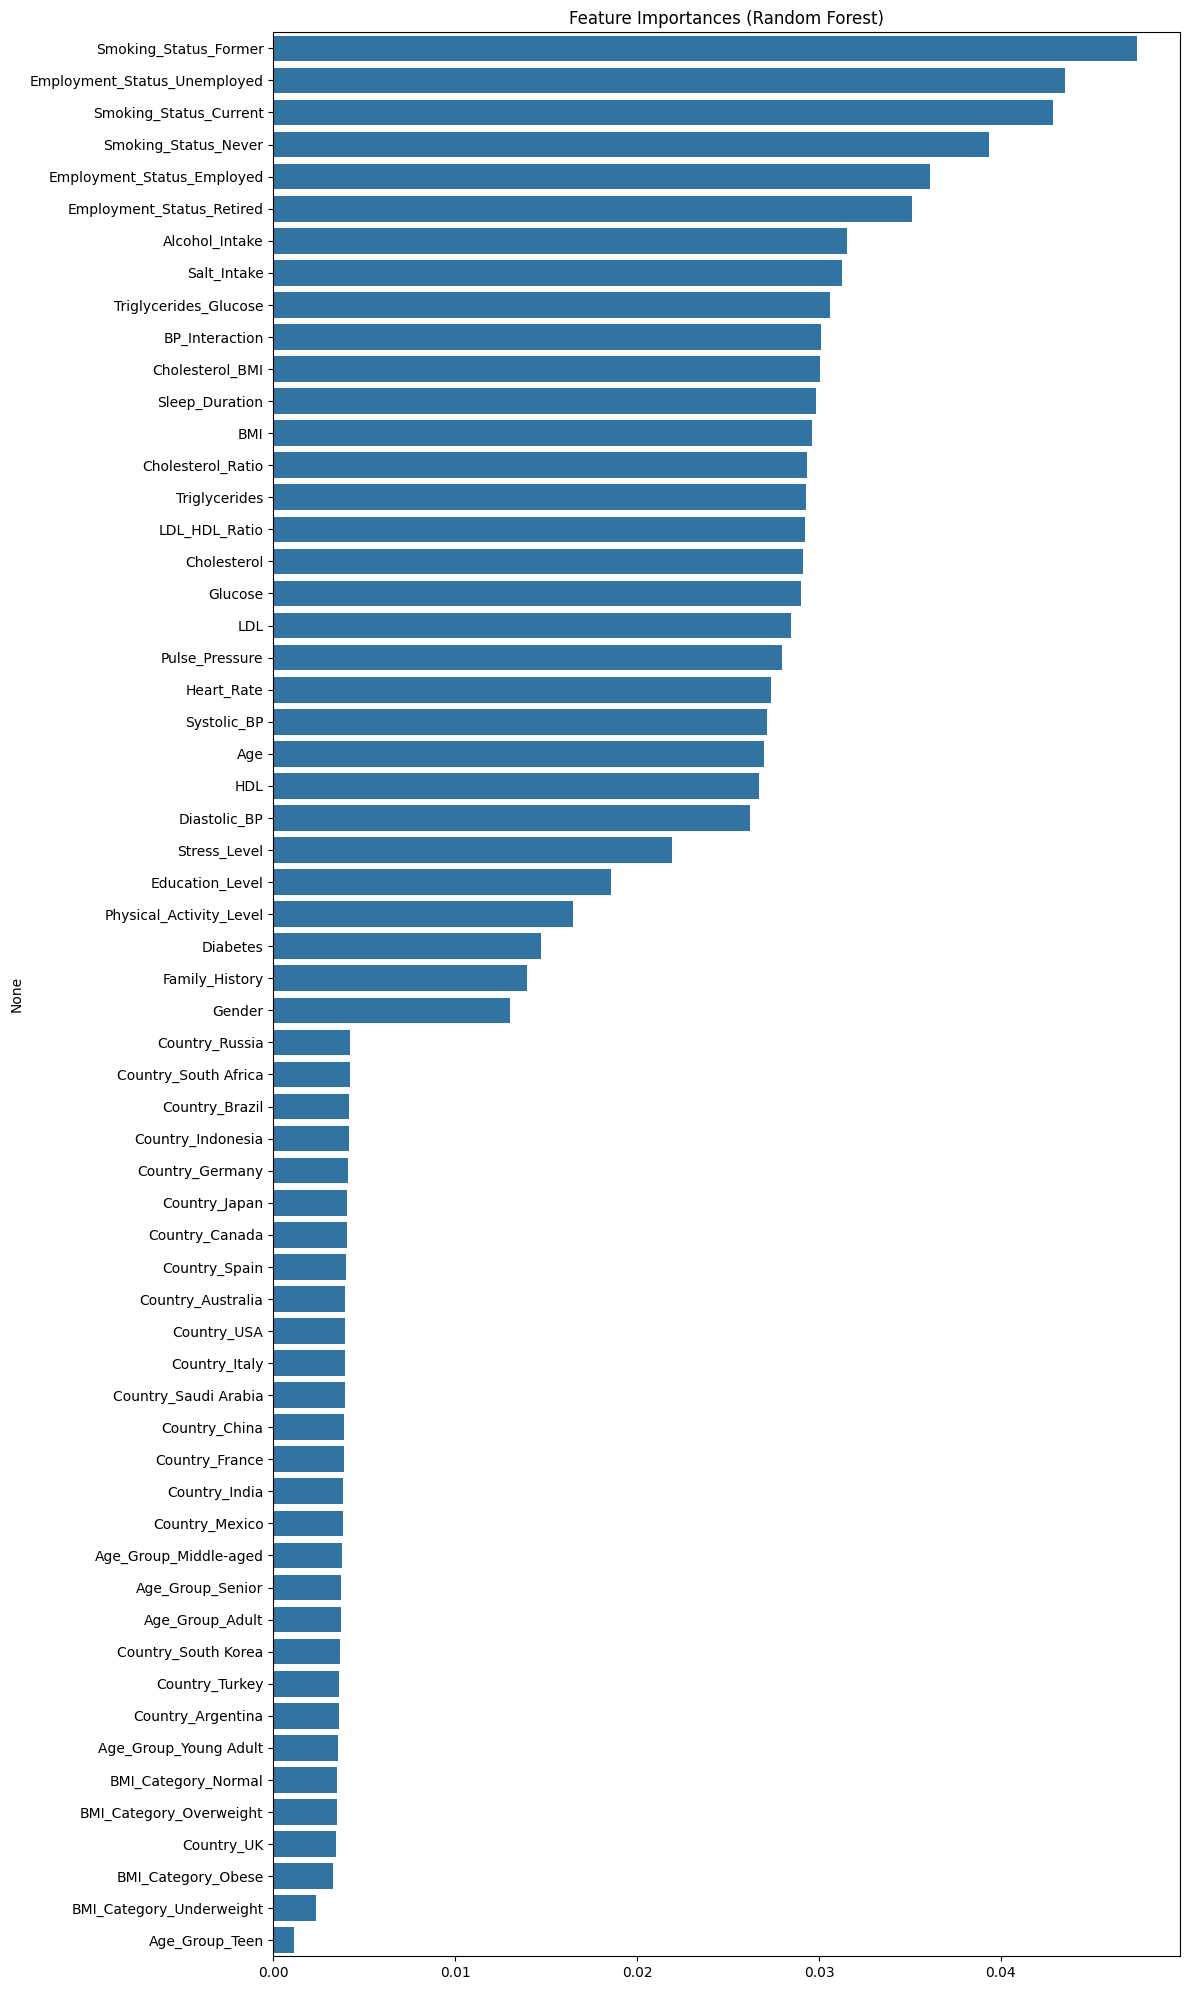

In [207]:
plt.figure(figsize=(12, 20))
sns.barplot(x=forest_importances.values, y=forest_importances.index)
plt.title('Feature Importances (Random Forest)')
plt.savefig('./results/eda_visualizations/15_feature_importance_random_forest.png')
plt.tight_layout()
plt.show()

In [208]:
# SelectKBest
top_k = 25
selector = SelectKBest(score_func=mutual_info_classif, k=top_k)
X_new = selector.fit_transform(X_train, y_train)
kbest_features = X_train.columns[selector.get_support()].tolist()
print(f"Top 25 features by SelectKBest: {kbest_features}")

Top 25 features by SelectKBest: ['BMI', 'Alcohol_Intake', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'Gender', 'Education_Level', 'Country_France', 'Country_Japan', 'Country_South Africa', 'Smoking_Status_Current', 'Smoking_Status_Former', 'Smoking_Status_Never', 'Employment_Status_Employed', 'Employment_Status_Retired', 'Employment_Status_Unemployed', 'Cholesterol_Ratio', 'Cholesterol_BMI', 'LDL_HDL_Ratio', 'BMI_Category_Obese', 'Age_Group_Senior']


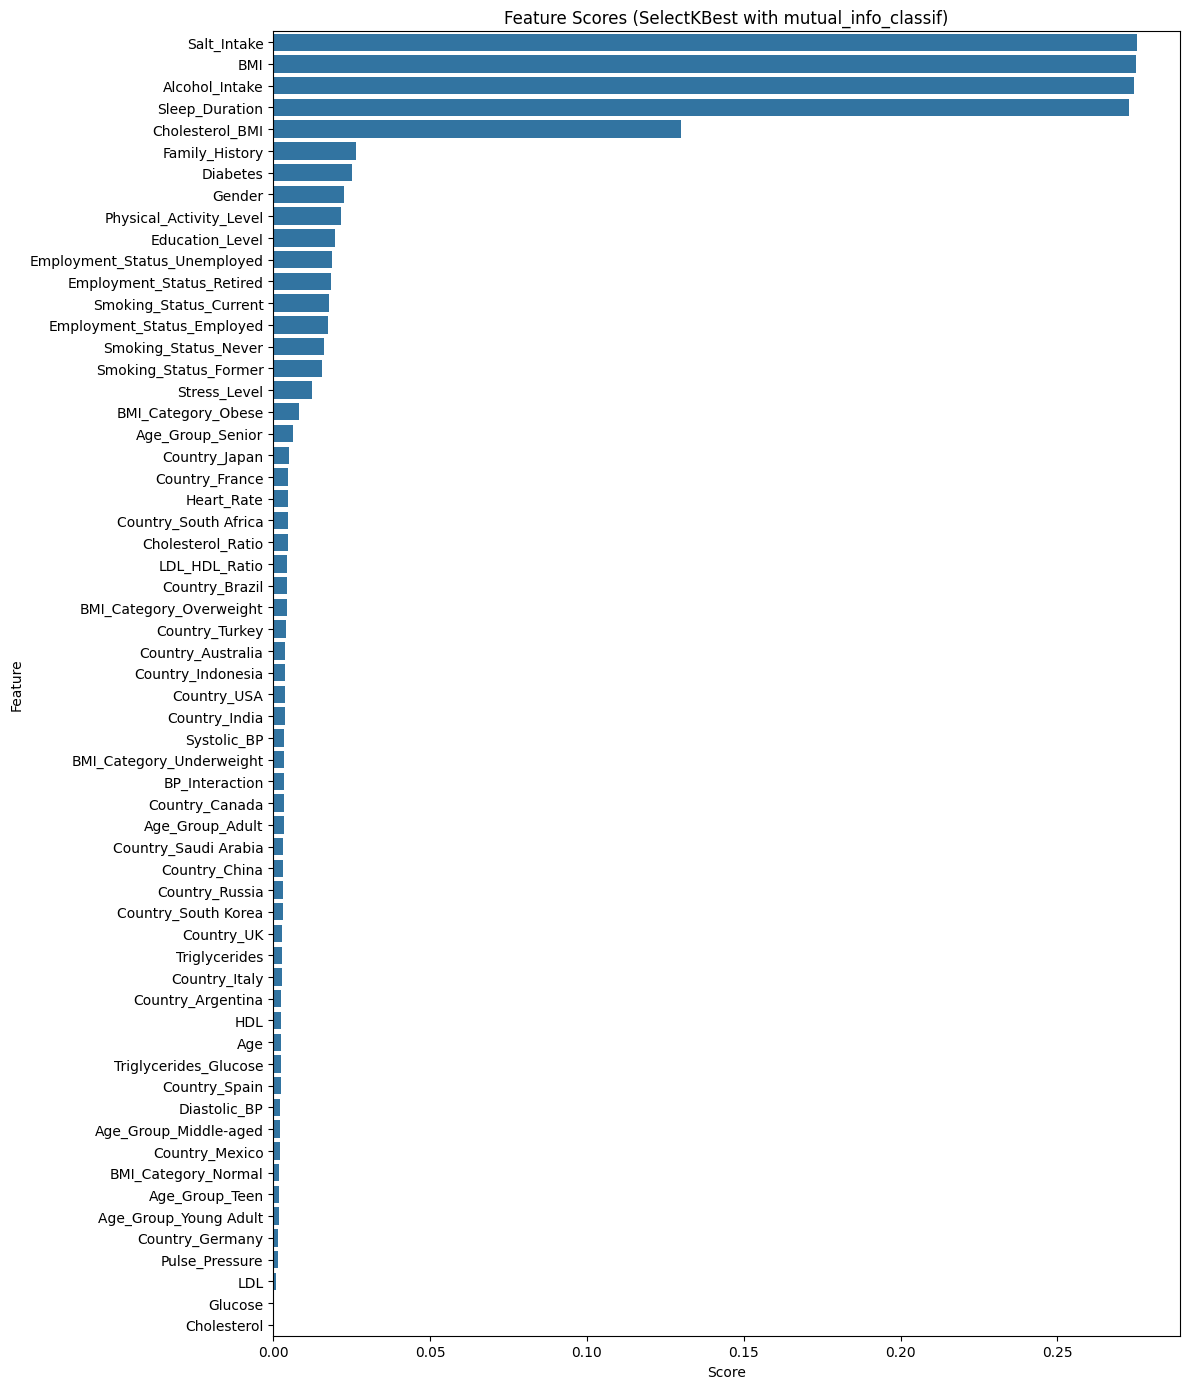

In [209]:
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
})

feature_scores = feature_scores.dropna().sort_values(by="Score", ascending=False)

plt.figure(figsize=(12,14))
sns.barplot(x="Score", y="Feature", data=feature_scores)
plt.title('Feature Scores (SelectKBest with mutual_info_classif)')
plt.savefig('./results/eda_visualizations/16_feature_importance_select_k_best.png')
plt.tight_layout()
plt.show()

In [210]:
# select features
all_features = var_features.tolist() + mi_features + kbest_features + rf_features
feature_counts = Counter(all_features)
print(feature_counts)

Counter({'Heart_Rate': 4, 'Age': 3, 'BMI': 3, 'Cholesterol': 3, 'Systolic_BP': 3, 'Diastolic_BP': 3, 'Alcohol_Intake': 3, 'Salt_Intake': 3, 'Sleep_Duration': 3, 'LDL': 3, 'HDL': 3, 'Triglycerides': 3, 'Glucose': 3, 'Pulse_Pressure': 3, 'Cholesterol_Ratio': 3, 'Cholesterol_BMI': 3, 'LDL_HDL_Ratio': 3, 'Stress_Level': 2, 'BP_Interaction': 2, 'Triglycerides_Glucose': 2, 'Country_South Africa': 2, 'Country_France': 2, 'Smoking_Status_Current': 2, 'Smoking_Status_Former': 2, 'Smoking_Status_Never': 2, 'Employment_Status_Employed': 2, 'Employment_Status_Retired': 2, 'Employment_Status_Unemployed': 2, 'Country_Argentina': 1, 'Age_Group_Middle-aged': 1, 'Age_Group_Teen': 1, 'BMI_Category_Underweight': 1, 'Age_Group_Adult': 1, 'Country_Canada': 1, 'Country_UK': 1, 'Country_Spain': 1, 'Country_South Korea': 1, 'Country_USA': 1, 'Country_Italy': 1, 'Country_Turkey': 1, 'Country_Germany': 1, 'Physical_Activity_Level': 1, 'Family_History': 1, 'Diabetes': 1, 'Gender': 1, 'Education_Level': 1, 'Count

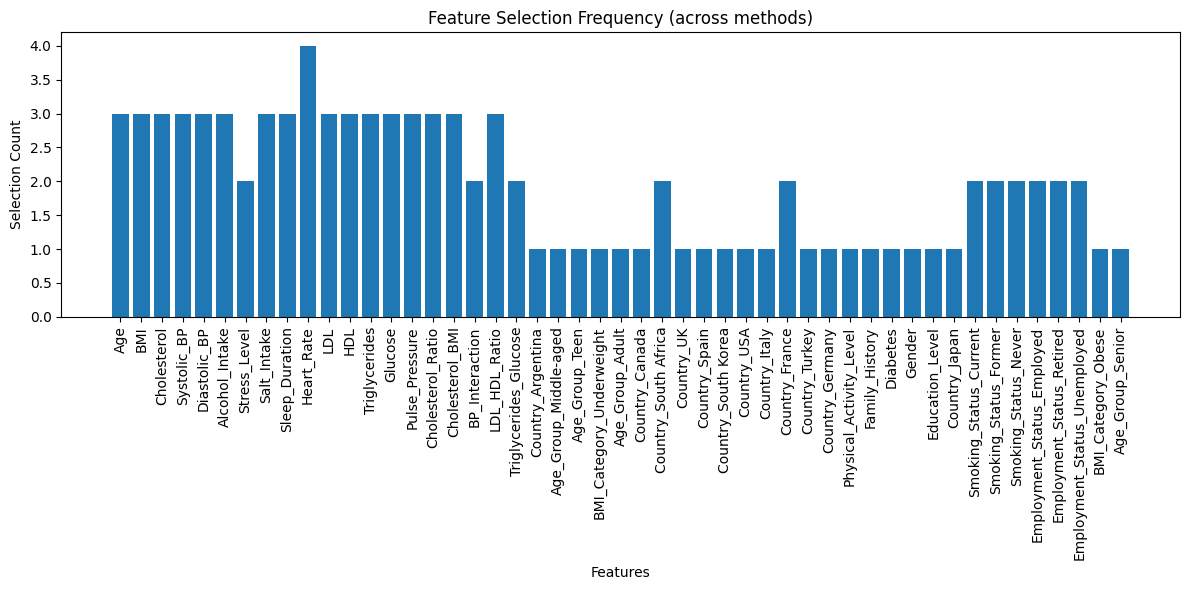

In [ ]:
# Convert Counter to dict
feature_names = list(feature_counts.keys())
counts = list(feature_counts.values())

# Feature selection summary
plt.figure(figsize=(12, 6))
plt.bar(feature_names, counts)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Selection Count")
plt.title("Feature Selection Frequency (across methods)")
plt.tight_layout()
plt.show()

In [212]:
# Features picked by 2 or more methods
final_features = [f for f, c in feature_counts.items() if c >= 2]

print("Final selected features:", final_features)
print("Count:", len(final_features))

Final selected features: ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose', 'Pulse_Pressure', 'Cholesterol_Ratio', 'Cholesterol_BMI', 'BP_Interaction', 'LDL_HDL_Ratio', 'Triglycerides_Glucose', 'Country_South Africa', 'Country_France', 'Smoking_Status_Current', 'Smoking_Status_Former', 'Smoking_Status_Never', 'Employment_Status_Employed', 'Employment_Status_Retired', 'Employment_Status_Unemployed']
Count: 28


In [213]:
# Create new DataFrame with only the final selected features
df_selected = df_original[final_features + ['Hypertension']]

print("Shape of new dataset:", df_selected.shape)
df_selected.head()

df_selected.to_csv("results/outputs/hypertension_dataset(encoded-balanced-feature_engineered-scaled-selected).csv", index=False)

Shape of new dataset: (251562, 29)


In [ ]:
# Dimensionality Reduction

# Features and target
X = df_selected.drop(columns=['Hypertension'])
y = df_selected['Hypertension']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare data (exclude target)
X = df_selected.drop('Hypertension', axis=1)
y = df_selected['Hypertension']

# Apply PCA with variance threshold
pca = PCA(n_components=0.99)  # Retain 90% of variance
X_pca = pca.fit_transform(X)

# Create new DataFrame
pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)
df_pca['Hypertension'] = y.values

print("Columns (After PCA) :",len(df_pca.columns))

df_pca.to_csv("results/outputs/hypertension_dataset(encoded-balanced-feature_engineered-scaled-selected-pca).csv", index=False)

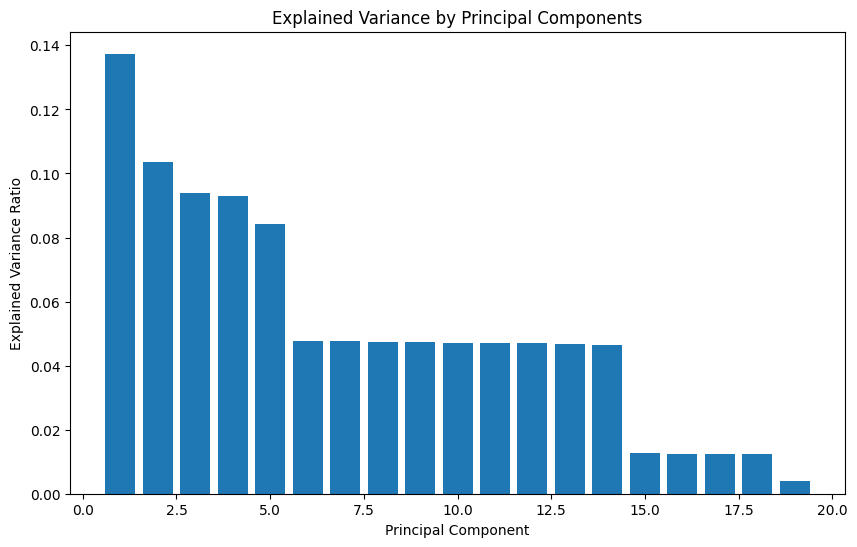

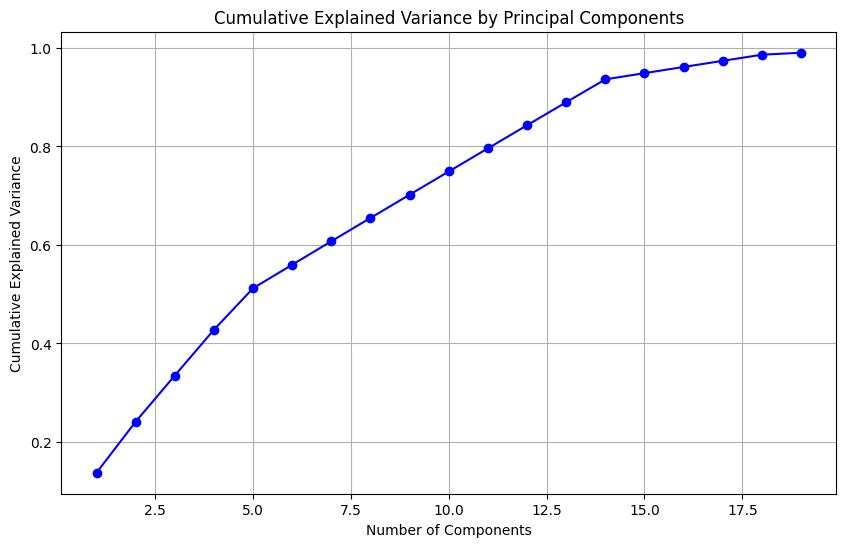

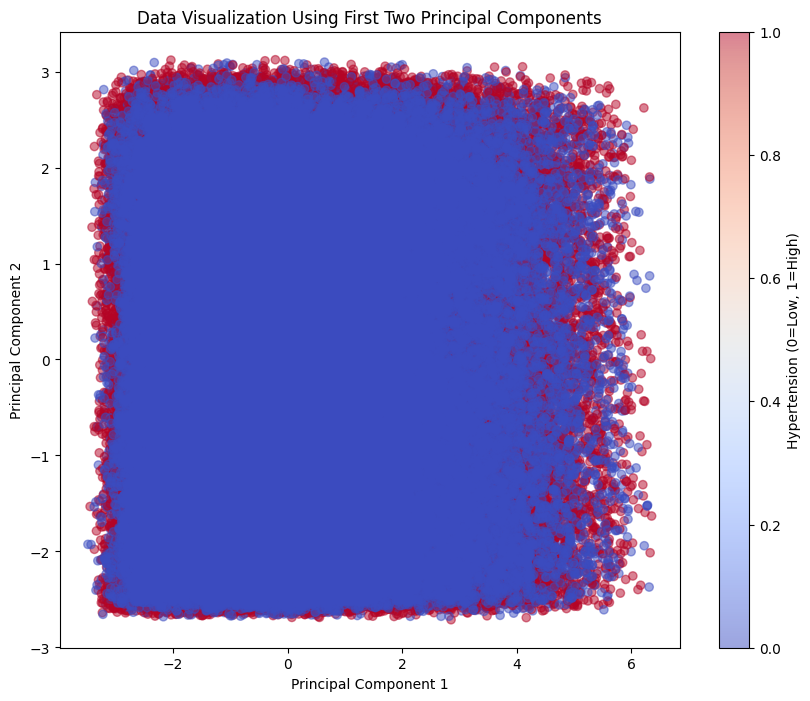

In [215]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.savefig('./results/eda_visualizations/17_pca_explained_variance.png')
plt.show()

# Cumulative Explained Variance
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'bo-')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.savefig('./results/eda_visualizations/18_pca_cumulative_variance.png')
plt.show()

# 2D Visualization of Data Using First Two Principal Components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('Data Visualization Using First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Hypertension (0=Low, 1=High)')
plt.savefig('./results/eda_visualizations/19_pca_2d_visualization.png')
plt.show()